Importing library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Reading Dataset


In [ ]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3778,spam,"Claim a 200 shopping spree, just call 08717895...",NaN,NaN,NaN
2978,spam,"Xmas Offer! Latest Motorola, SonyEricsson & No...",NaN,NaN,NaN
3829,ham,I agree. So i can stop thinkin about ipad. Can...,NaN,NaN,NaN
4397,ham,Can you tell Shola to please go to college of ...,NaN,NaN,NaN
2416,ham,"Could you not read me, my Love ? I answered you",NaN,NaN,NaN


In [ ]:
# drop last 3 cols
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
data.sample(5)

,v1,v2
3549,ham,Dad wanted to talk about the apartment so I go...
3614,ham,I enjoy watching and playing football and bask...
2358,ham,I'll talk to the others and probably just come...
2820,ham,Oh god..taken the teeth?is it paining
3334,ham,"Sorry, got a late start, we're on the way"


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
data['v1'] = encoder.fit_transform(data['v1'])

In [ ]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
 # renaming the cols
data.rename(columns={'v1': 'spam','v2': 'text'},inplace=True)
data.sample(5)

,spam,text
2605,0,\HELLO U.CALL WEN U FINISH WRK.I FANCY MEETIN ...
986,0,I'm in office now . I will call you &lt;#&gt;...
5431,0,If I was I wasn't paying attention
2995,0,They released vday shirts and when u put it on...
306,0,Jos ask if u wana meet up?


In [ ]:
data.shape

(5572, 2)

In [ ]:
data['text'][5120]

'PRIVATE! Your 2003 Account Statement for 078'

In [ ]:
data['spam'].value_counts()

0    4825
1     747
Name: spam, dtype: int64

In [ ]:
import seaborn as sns

<Axes: ylabel='count'>

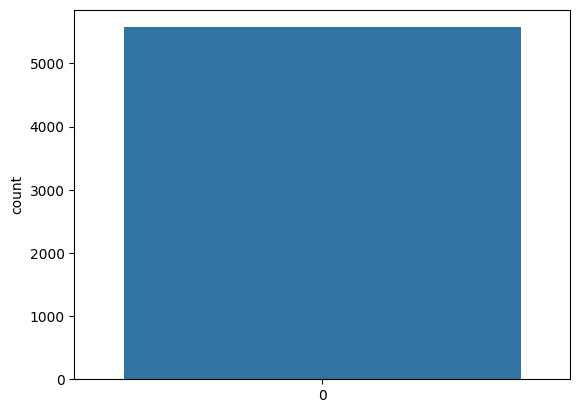

In [ ]:
sns.countplot(data['spam'])
# plt.figure(figsize=(5,3))
# sns.histplot(data[data['spam'] == 0])
# sns.histplot(data[data['spam'] == 1],color='red')

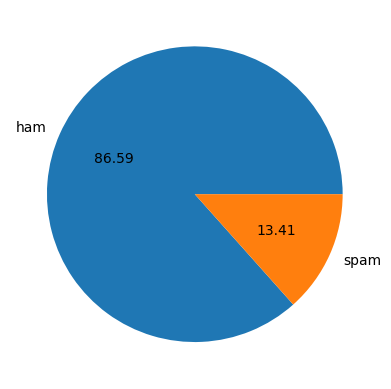

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data['spam'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
data.duplicated().sum()

403

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

spam    0
text    0
dtype: int64

In [ ]:
data.shape

(5169, 2)

<Axes: ylabel='count'>

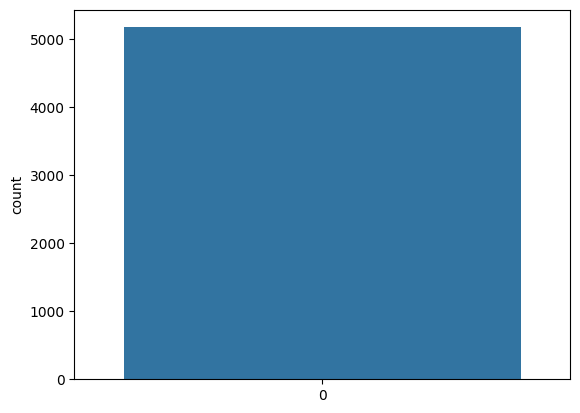

In [ ]:
sns.countplot(data['spam'])

In [ ]:
data['spam'].value_counts()

0    4516
1     653
Name: spam, dtype: int64

SEPARATE IN X AND Y


In [ ]:
X = data['text'].values
y = data['spam'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

Train- Test Split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [ ]:
X_train.shape

(4135,)

In [ ]:
X_test.shape

(1034,)

In [ ]:
y_train.shape

(4135,)

In [ ]:
y_test.shape

(1034,)

**Preprocessing**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(x_train.toarray())

4135

In [ ]:
len(x_train.toarray()[0])

7594

Training by ML **Algorithm**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
x_test = cv.transform(X_test)

In [ ]:
len(x_test.toarray())

1034

In [ ]:
len(x_test.toarray()[0])

7594

In [ ]:
y_pred = nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.9816247582205029

In [ ]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9929866989117292

Test using some **Emails**

In [ ]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']

In [ ]:
clean_email = cv.transform(email)

In [ ]:
len(clean_email.toarray()[0])

7594

In [ ]:
check = nb.predict(clean_email)[0]

In [ ]:
check

0

In [ ]:
email = ['U dun say so early hor... U c already then say...']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Ham Email!
